In [1]:
import os
import zipfile

In [3]:
print(os.listdir('DataSets/'))

['cats_and_dogs_filtered.zip', 'cifar10', 'dogs-vs-cats.zip', 'horse-or-human.zip', 'rock-paper-scissors-dataset.zip', 'rps-validation.zip', 'sign-language-mnist.zip', 'Unconfirmed 752831.crdownload', 'validation-horse-or-human.zip']


In [6]:
RPS_Dir='DataSets/rock-paper-scissors-dataset.zip'
zip_Ref=zipfile.ZipFile(RPS_Dir,'r')
zip_Ref.extractall('DataSets/rock-paper-scissors-dataset/')
zip_Ref.close()

In [7]:
print(os.listdir('DataSets/rock-paper-scissors-dataset/'))

['Rock-Paper-Scissors']


In [8]:
path_Dataset='DataSets/rock-paper-scissors-dataset/'

In [15]:
Rock_Dir=path_Dataset+'train/rock'
Paper_Dir=path_Dataset+'train/paper'
scissors_Dir=path_Dataset+'train/scissors'

print("Total Rock Images :" ,len(os.listdir(Rock_Dir)))
print("Total Paper Images :" ,len(os.listdir(Paper_Dir)))
print("Total Scissor Images :" ,len(os.listdir(scissors_Dir)))

RockFiles=os.listdir(Rock_Dir)
PaperFiles=os.listdir(Paper_Dir)
ScissorFiles=os.listdir(scissors_Dir)

print(RockFiles[:10])
print(PaperFiles[:10])
print(ScissorFiles[:10])

Total Rock Images : 840
Total Paper Images : 840
Total Scissor Images : 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

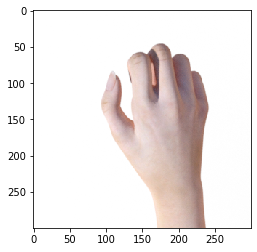

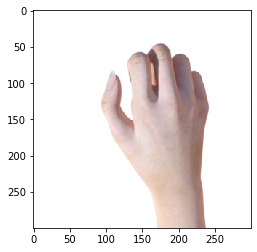

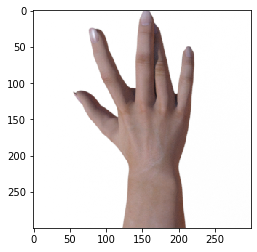

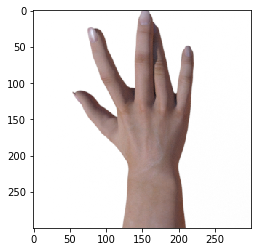

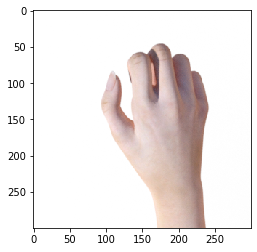

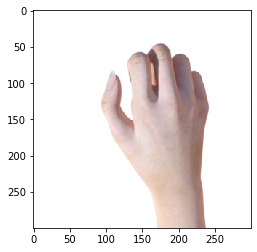

In [23]:
pic_index=2

nextRock=[os.path.join(Rock_Dir , fname)
         for fname in RockFiles[pic_index-2:pic_index]]
nextPaper=[os.path.join(Paper_Dir, fname)
          for fname in PaperFiles[pic_index-2:pic_index]]
nextScissoe=[os.path.join(Rock_Dir, fname)
            for fname in RockFiles[pic_index-2:pic_index]]

for i , img_path in enumerate(nextRock+nextPaper+nextScissoe):
    img=mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('On')
    plt.show()

In [25]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [27]:
TrainingDir=path_Dataset+'train'
training_DateGen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

ValidationDir=path_Dataset+'test'
validation_DataGen=ImageDataGenerator(rescale=1./255)

train_generator=training_DateGen.flow_from_directory(
    TrainingDir,
    target_size=(150,150),
    class_mode='categorical')

validation_generator = validation_DataGen.flow_from_directory(
    ValidationDir,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [36]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3) , activation='relu' , input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3) , activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3) , activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [38]:
epochs=25
vaerbose_Obj=1

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop' , metrics=['accuracy'])

In [40]:
history=model.fit_generator(train_generator , epochs=epochs, validation_data=validation_generator , verbose=vaerbose_Obj)

Epoch 1/25
79/79 [==============================] - 80s 1s/step - loss: 1.1089 - accuracy: 0.3679 - val_loss: 1.1000 - val_accuracy: 0.5027
Epoch 2/25
79/79 [==============================] - 100s 1s/step - loss: 0.9617 - accuracy: 0.5425 - val_loss: 0.3987 - val_accuracy: 0.9489
Epoch 3/25
79/79 [==============================] - 121s 2s/step - loss: 0.6316 - accuracy: 0.7306 - val_loss: 0.1562 - val_accuracy: 0.9704
Epoch 4/25
79/79 [==============================] - 125s 2s/step - loss: 0.4345 - accuracy: 0.8282 - val_loss: 0.2135 - val_accuracy: 0.9140
Epoch 5/25
79/79 [==============================] - 124s 2s/step - loss: 0.3308 - accuracy: 0.8758 - val_loss: 0.1005 - val_accuracy: 0.9731
Epoch 6/25
79/79 [==============================] - 124s 2s/step - loss: 0.2649 - accuracy: 0.9103 - val_loss: 0.0365 - val_accuracy: 0.9973
Epoch 7/25
79/79 [==============================] - 124s 2s/step - loss: 0.2072 - accuracy: 0.9270 - val_loss: 0.0486 - val_accuracy: 0.9677
Epoch 8/25
79/

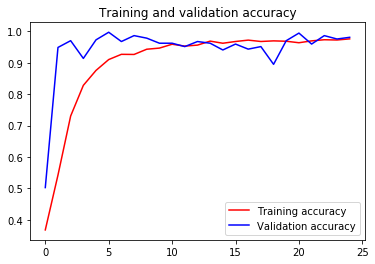

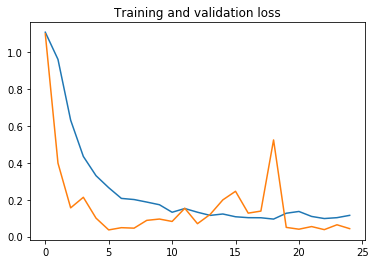

In [42]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

plt.show()

In [52]:
import numpy as np
path = path_Dataset + '4.png'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)

DataSets/rock-paper-scissors-dataset/4.png
[[1. 0. 0.]]
